In [22]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.keys())
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [25]:
# Initializing the data frame
data = pd.DataFrame(boston.data)
print(data.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [26]:
# Adding feature names to datahead
data.columns = boston.feature_names
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [27]:

# adding target variable to dataframa
data['PRICE'] = boston.target

In [28]:
data.shape



(506, 14)

In [29]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [30]:

# Finding out correlation between features
corr = data.corr()
print(corr.shape)

(14, 14)


In [31]:
# Splitting target variables and independent variables
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']
# print(y)

In [32]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
# Linear regression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
y_predict = linearReg.predict(X_train)
# print(y_predict)

In [34]:
# Coefficient 
linearReg.coef_

# intercept
linearReg.intercept_


36.93325545711978

In [35]:
# Finding R2 MAE, MSE, RMSE
R2 = r2_score(y_train,y_predict)
MAE = mean_absolute_error(y_train, y_predict)
MSE = mean_squared_error(y_train, y_predict)
RMSE = np.sqrt(MSE)
print("R2", R2)
print("MAE", MAE)
print("MSE", MSE)
print("RMSE", RMSE)


R2 0.7697699488741149
MAE 3.1039668582990787
MSE 19.640519427908043
RMSE 4.431762564477935


Text(0.5, 1.0, 'Predicted VS Residuals')

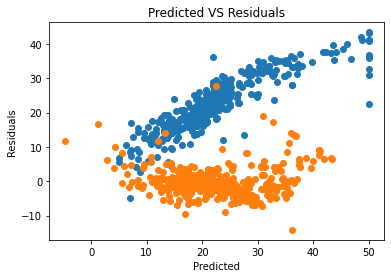

In [36]:
# Plotting graphs
plt.scatter(y_train, y_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices VS Predicted Prices")

# Checking residuals
plt.scatter(y_predict, y_train-y_predict)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted VS Residuals")